<a href="https://colab.research.google.com/github/shriyapalkar/hands_on-data-science-projects/blob/main/Amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Amazon Sale Report.csv')
df

<ipython-input-1-c7e1ca67e021>:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42524,42523,407-1038766-5595532,04-05-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,699.00,INDORE,MADHYA PRADESH,452010.0,IN,False,NaN,NaN,NaN
42525,42524,407-1038766-5595532,04-05-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,873.00,INDORE,MADHYA PRADESH,452010.0,IN,False,NaN,NaN,NaN
42526,42525,407-1038766-5595532,04-05-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,715.00,INDORE,MADHYA PRADESH,452010.0,IN,False,NaN,NaN,NaN
42527,42526,407-1038766-5595532,04-05-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,678.00,INDORE,MADHYA PRADESH,452010.0,IN,False,NaN,NaN,NaN


In [ ]:
#check for null
df.isnull().sum()

,0
index,0
Order ID,0
Date,1
Status,1
Fulfilment,1
Sales Channel,1
ship-service-level,1
Category,1
Size,1
Courier Status,1


In [ ]:
#fill the null
df.fillna(0,inplace=True)

In [ ]:
#check for null
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
#perform etl
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49679 entries, 0 to 49678
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               49679 non-null  int64  
 1   Order ID            49679 non-null  object 
 2   Date                49679 non-null  object 
 3   Status              49679 non-null  object 
 4   Fulfilment          49679 non-null  object 
 5   Sales Channel       49679 non-null  object 
 6   ship-service-level  49679 non-null  object 
 7   Category            49679 non-null  object 
 8   Size                49679 non-null  object 
 9   Courier Status      49679 non-null  object 
 10  Qty                 49679 non-null  float64
 11  currency            49679 non-null  object 
 12  Amount              49679 non-null  float64
 13  ship-city           49679 non-null  object 
 14  ship-state          49679 non-null  object 
 15  ship-postal-code    49679 non-null  float64
 16  ship

In [ ]:
#perform eda
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,49679.000000,49679.000000,49679.000000,49679.000000,49679.0,49679.0
mean,24837.040520,0.901347,588.417905,464706.519797,0.0,0.0
std,14342.555876,0.327661,304.110672,194773.238248,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,12418.500000,1.000000,399.000000,380054.000000,0.0,0.0
50%,24838.000000,1.000000,549.000000,500025.000000,0.0,0.0
75%,37257.500000,1.000000,759.000000,600041.000000,0.0,0.0
max,49677.000000,15.000000,5584.000000,989898.000000,0.0,0.0


<Axes: xlabel='Category', ylabel='count'>

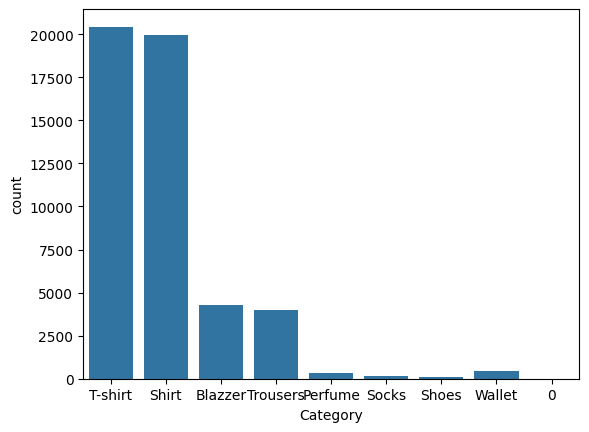

In [ ]:
#Analyze the distribution of product categories, sizes, and quantities sold to idenƟfy popular products.
df['Category'].value_counts()
#graph for category
sns.countplot(x='Category',data=df)


<Axes: xlabel='Size', ylabel='count'>

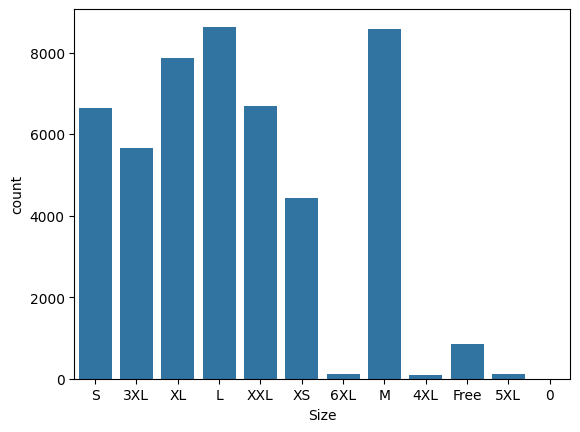

In [ ]:
df['Size'].value_counts()
#graph for size
sns.countplot(x='Size',data=df)


<Axes: xlabel='Qty', ylabel='count'>

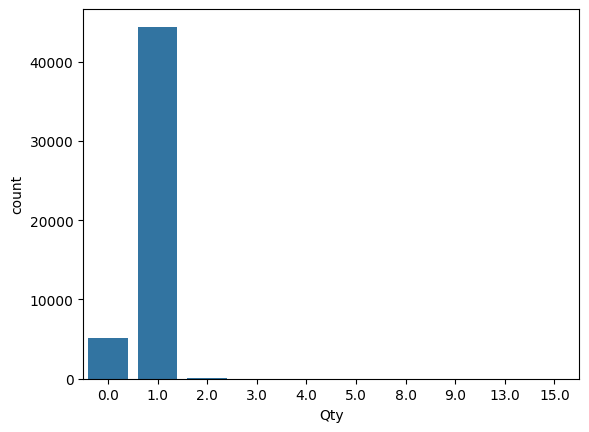

In [ ]:
df['Qty'].value_counts()
#gragh for quantity
sns.countplot(x='Qty',data=df)

<Axes: xlabel='fulfilled-by', ylabel='count'>

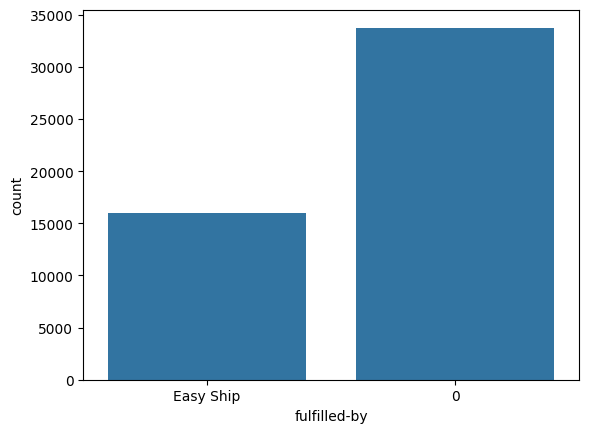

In [ ]:
#Investegate the fulfillment methods used and their effectiveness in delivering orders.
df['fulfilled-by'].value_counts()
#graph for fulfilled by
# Remove the extra space at the end of 'fulfilled-by '
sns.countplot(x='fulfilled-by', data=df)

<Axes: xlabel='Category'>

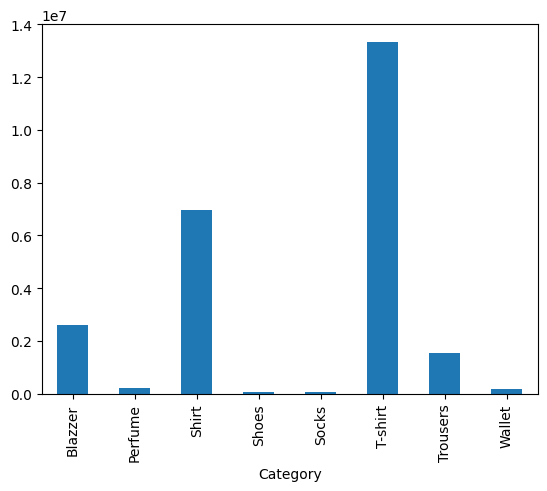

In [6]:
#columns 	index	Order ID	Date	Status	Fulfilment	Sales Channel	ship-service-level	Category	Size	Courier Status	...	currency	Amount	ship-city	ship-state	ship-postal-code	ship-country	B2B	fulfilled-by	New	PendingS
#draw insights of product prefences
df.groupby('Category')['Amount'].sum().plot(kind='bar')


Category
Blazzer      2603166.83
Perfume       218895.65
Shirt        6972431.43
Shoes          51510.24
Socks          59719.97
T-shirt     13335281.97
Trousers     1537322.40
Wallet        173228.45
Name: Amount, dtype: float64


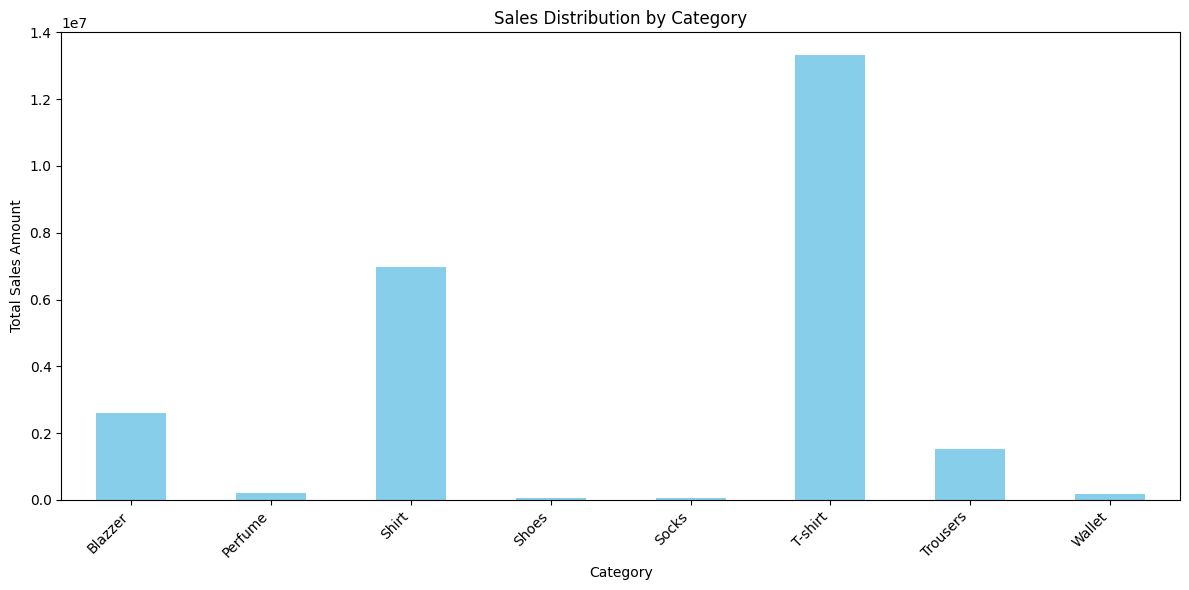

In [15]:

# Analyze sales distribution across different categories
sales_by_category = df.groupby('Category')['Amount'].sum()
print(sales_by_category)

# Visualize sales distribution by category
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Categories: The horizontal axis (x-axis) represents different product categories.  Based on the visible bars, these categories include:

Blazer
Perfume
Shirt
Shoes
Socks
T-shirt
Trousers
Wallet
Sales Amount: The vertical axis (y-axis) represents the "Total Sales Amount".  The values on this axis indicate the monetary value of sales for each category. The chart suggests the sales amount is in the range of 0 to 1.4e7 (which likely means 14 million, using scientific notation).

Interpretation and Insights:

T-shirt Dominance: The most striking feature is the extremely tall bar for "T-shirt". This indicates that the T-shirt category has significantly higher sales than any other category. It's the clear best-selling product.

Moderate Sales for Shirts and Trousers:  The "Shirt" and "Trousers" categories show moderate sales, noticeably higher than the remaining categories but far less than T-shirts.

Low Sales for Other Categories:  The categories "Blazer," "Perfume," "Shoes," "Socks," and "Wallet" have relatively low sales figures compared to T-shirts, Shirts, and Trousers.

Possible Implications and Further Analysis:

Focus on T-shirts: The high demand for T-shirts suggests focusing marketing and inventory strategies on this category. Understanding why T-shirts are so popular (e.g., price point, designs, target audience) is crucial.

Potential for Shirts and Trousers: While not as dominant as T-shirts, "Shirts" and "Trousers" still generate a respectable amount of sales. Investigating opportunities to boost sales in these categories could be worthwhile.

Re-evaluate Low-Performing Categories: The categories with low sales might warrant a closer look.

Time Series Analysis: Analyzing sales trends over time for each category would provide insights into seasonality and growth patterns.

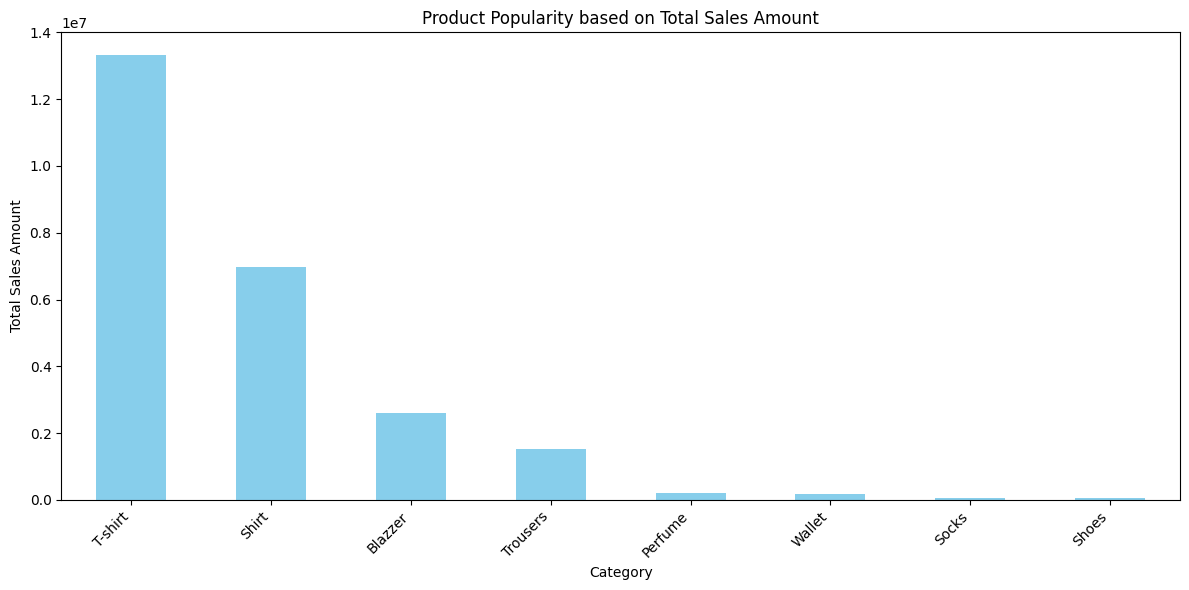

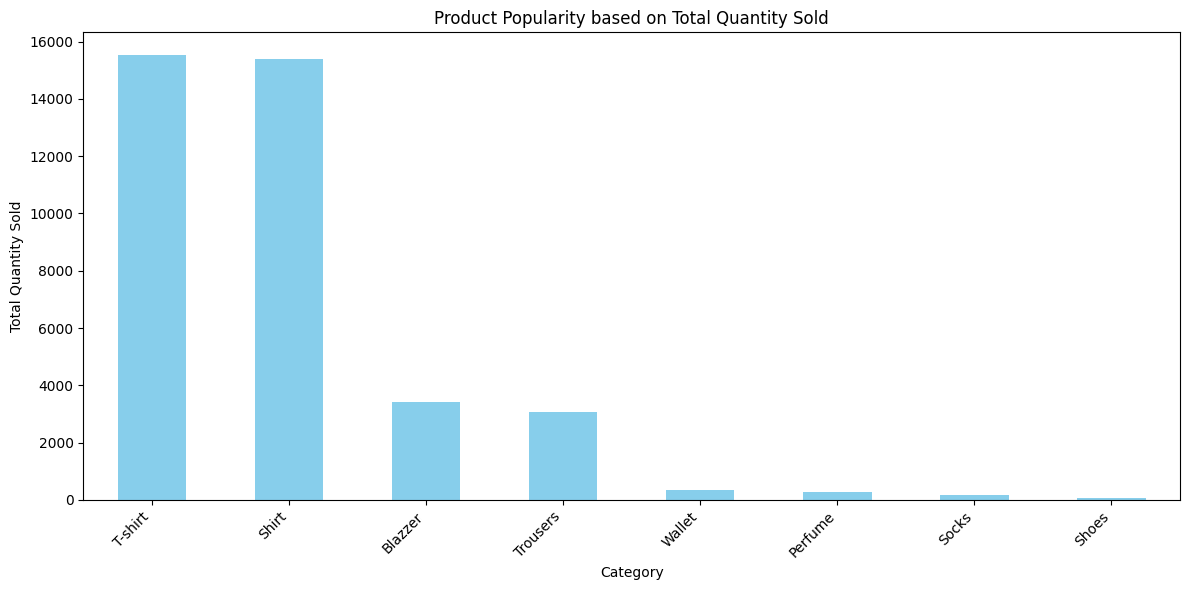

In [14]:


# Analyze sales distribution across different categories
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Visualize sales distribution by category
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Product Popularity based on Total Sales Amount')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Alternatively you can use quantity sold as a proxy for popularity
quantity_by_category = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
quantity_by_category.plot(kind='bar', color='skyblue')
plt.title('Product Popularity based on Total Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 locations by sales:
       ship-city     ship-state      Amount
421   BENGALURU      KARNATAKA  2026776.11
1555  HYDERABAD      TELANGANA  1428061.03
2906  NEW DELHI          DELHI  1189628.79
2597     MUMBAI    MAHARASHTRA  1168116.43
799     CHENNAI     TAMIL NADU   861630.54
3355       PUNE    MAHARASHTRA   725772.98
2023    KOLKATA    WEST BENGAL   515895.41
1401   GURUGRAM        HARYANA   370961.43
4122      THANE    MAHARASHTRA   329280.20
2364    LUCKNOW  UTTAR PRADESH   306533.36


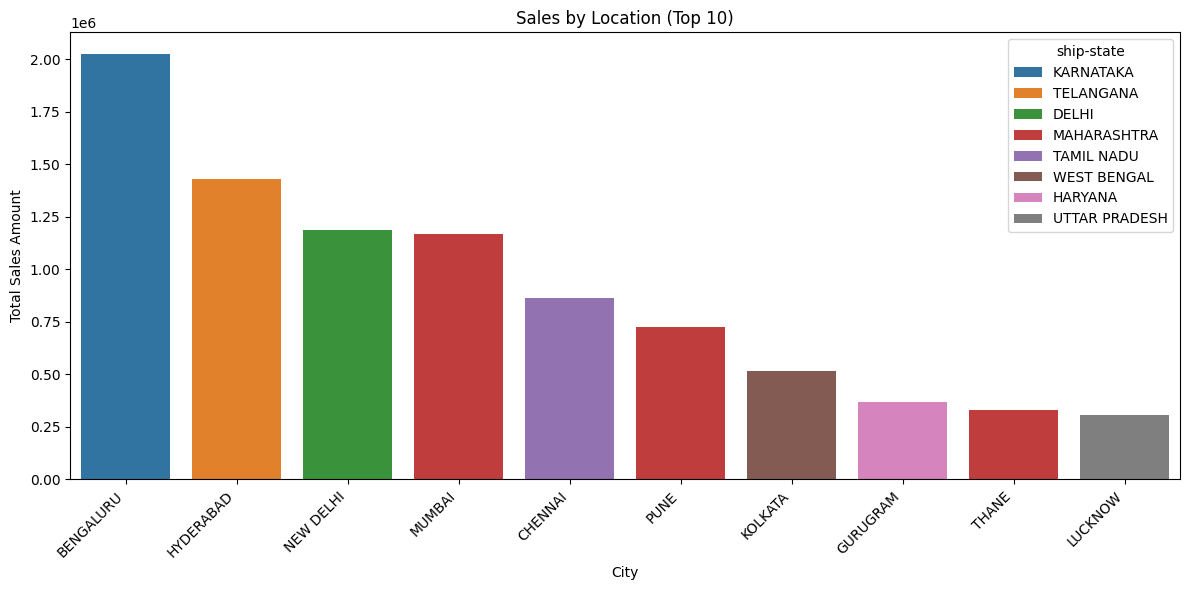

In [11]:


# Assuming 'ship-city' and 'ship-state' columns represent location data.
# If you have latitude/longitude, use those instead for more precise analysis.

# Group by location and aggregate relevant metrics (e.g., sales, quantity)
location_sales = df.groupby(['ship-city', 'ship-state'])['Amount'].sum().reset_index()

# Identify top locations by sales
top_locations = location_sales.sort_values('Amount', ascending=False).head(10) #Top 10 locations
print("Top 10 locations by sales:\n", top_locations)

# Visualize sales by location
plt.figure(figsize=(12, 6))
sns.barplot(x='ship-city', y='Amount', hue='ship-state', data=top_locations)
plt.title('Sales by Location (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Further Analysis
#Customer Segmentation by location
#Geographic trends
#Correlation between Location and other metrics
#Seasonality analysis based on location
#Customer lifetime value at each location


Data and Representation:

X-axis (Horizontal): This axis represents the locations, specifically the top 10 cities with the highest sales. The cities listed are:

BENGALURU
HYDERABAD
NEW DELHI
MUMBAI
CHENNAI
PUNE
KOLKATA
GURUGRAM
THANE
LUCKNOW
Y-axis (Vertical): This axis represents the "Total Sales Amount." The values along this axis indicate the monetary value of sales for each location. The chart suggests the sales amount is in the range of 0 to 2e6 (which likely means 2 million).

Bars: Each bar represents the total sales for a specific city. The height of the bar corresponds to the sales amount.

Legend: The legend on the right side of the chart shows the states associated with each color used in the bars. This allows you to see the state breakdown for each city. The states represented are:

KARNATAKA
TELANGANA
DELHI
MAHARASHTRA
TAMIL NADU
WEST BENGAL
HARYANA
UTTAR PRADESH
Interpretation and Insights:

Bengaluru Dominance: The tallest bar, representing Bengaluru, indicates that this city has the highest total sales among the top 10 locations.

High Sales in Hyderabad and New Delhi: Hyderabad and New Delhi also show significantly high sales, although less than Bengaluru.

Moderate Sales in Mumbai, Chennai, and Pune: Mumbai, Chennai, and Pune exhibit moderate sales figures.

Relatively Lower Sales in Other Cities: Kolkata, Gurugram, Thane, and Lucknow have relatively lower sales compared to the top performers.

State-wise Contribution: The legend allows you to see the state distribution. For instance, Bengaluru's sales are entirely attributed to Karnataka, while Hyderabad's sales are from Telangana.  New Delhi is its own union territory. Mumbai and Pune are both in Maharashtra.

Possible Implications and Further Analysis:

Focus on Top Performers: The high sales in Bengaluru, Hyderabad, and New Delhi suggest focusing marketing and operational efforts on these key locations.

Investigate Drivers of Success: Understanding the factors contributing to Bengaluru's high sales could provide insights for improving performance in other cities.

Regional Strategies: Tailoring sales and marketing strategies to the specific characteristics of each region could be beneficial.

Comparison with Other Data: Combining this sales data with other relevant information, such as population demographics, economic indicators, or competitor data, could provide a more comprehensive understanding of the market.

Time Series Analysis: Analyzing sales trends over time for each location would reveal seasonal patterns and growth trajectories.

The chart highlights Bengaluru as the top-performing location in terms of sales, followed by Hyderabad and New Delhi.  This information can be valuable for making strategic decisions related to resource allocation, marketing campaigns, and operational focus.  Further investigation is needed to understand the underlying reasons for these performance differences and to identify opportunities for growth in other locations.

<ipython-input-10-0898cee7df9c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime if not already


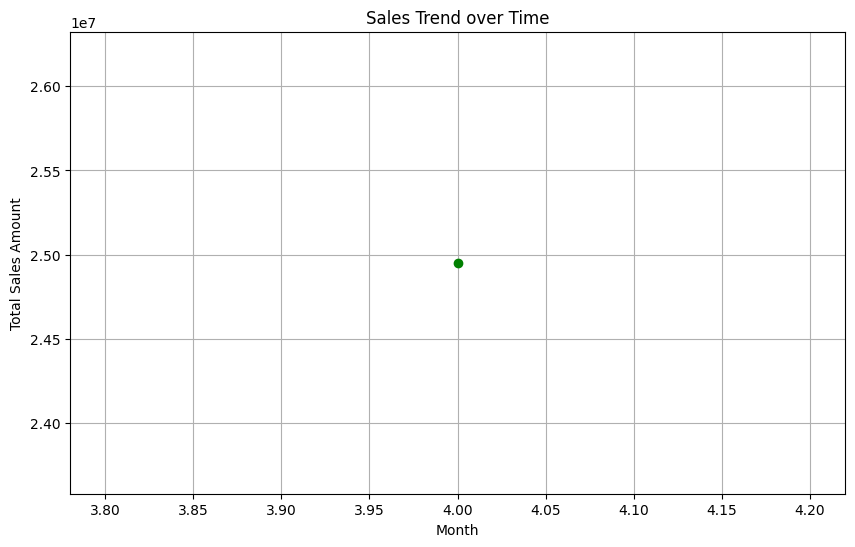

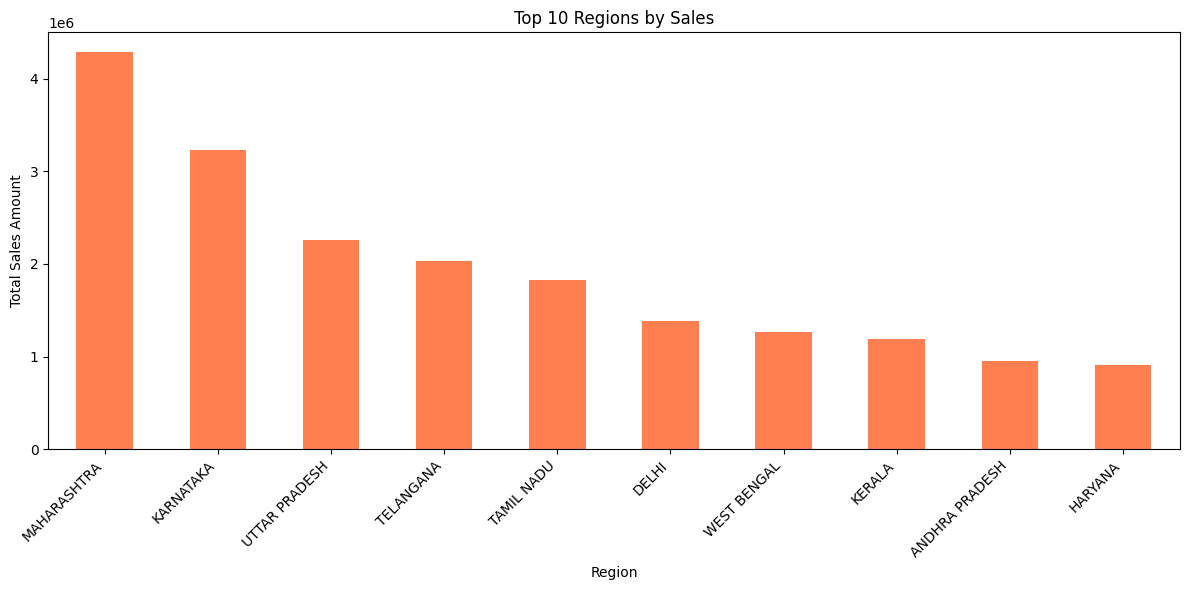

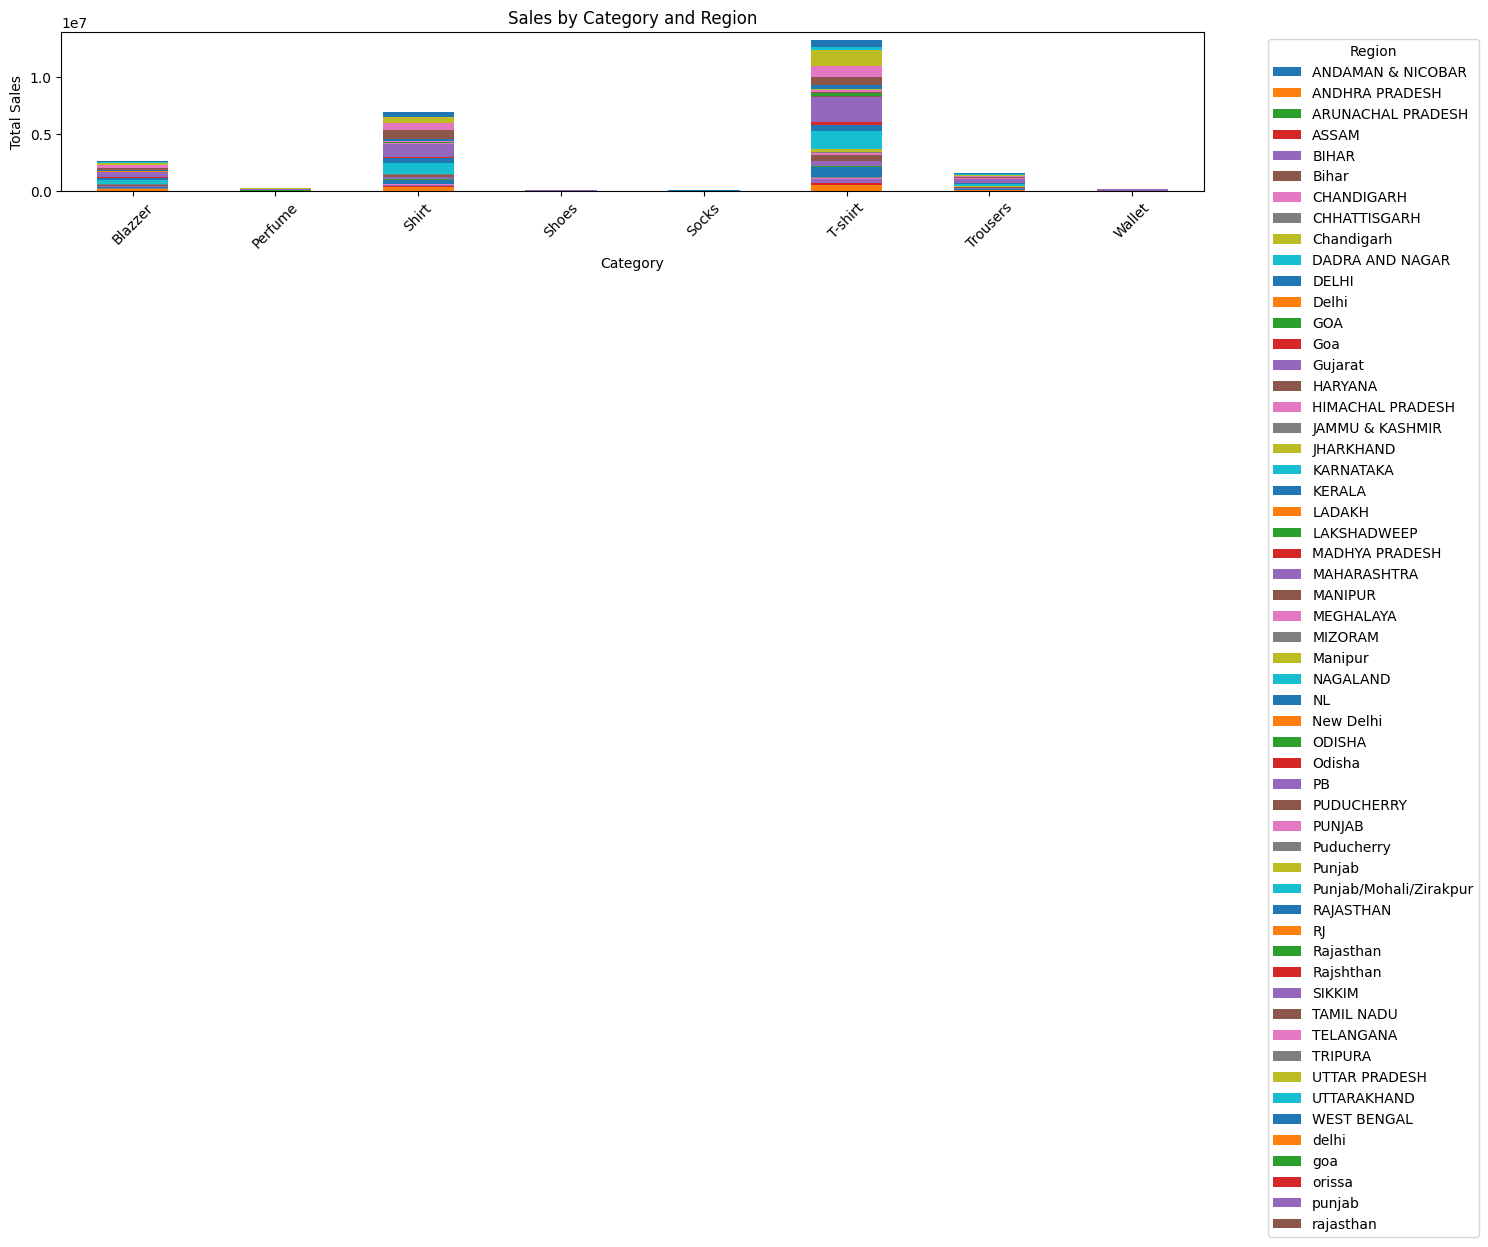

In [10]:
# prompt: Regional Trends of the above data set

# Analyze sales trends over time (assuming 'Date' column is in datetime format)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime if not already
df['Month'] = df['Date'].dt.month  # Extract the month from the 'Date' column
sales_by_month = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o', color='green')
plt.title('Sales Trend over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


# Sales Performance by Region (Assuming you have a 'ship-state' column)
sales_by_region = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_region.head(10).plot(kind='bar', color='coral')  # Show top 10 regions
plt.title('Top 10 Regions by Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Combine Category and Region for deeper insights
sales_by_category_region = df.groupby(['Category', 'ship-state'])['Amount'].sum().unstack()

sales_by_category_region.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sales by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.tight_layout()
plt.show()


Conclusion based on the provided Amazon Sales Report analysis (Top 10 Cities):

The analysis of the Amazon sales report, focusing on the top 10 cities, reveals key insights into sales distribution and performance.  Bengaluru stands out as the highest-performing city, significantly exceeding sales in other locations.  Hyderabad and New Delhi also demonstrate strong sales figures, followed by Mumbai and Chennai.  Other cities in the top 10, including Pune, Kolkata, Gurugram, Thane, and Lucknow, contribute to sales but at a lower scale.

Key Findings:

Dominant City: Bengaluru accounts for the largest share of sales among the top 10 cities, highlighting its importance as a key market.
High-Performing Cities: Hyderabad and New Delhi also exhibit robust sales performance, indicating significant market potential in these locations.
Moderate Sales in Major Metros: Mumbai and Chennai contribute moderately to overall sales, reflecting their status as major metropolitan areas.
Emerging Markets: Cities like Pune, Kolkata, Gurugram, Thane, and Lucknow represent emerging markets with potential for growth, although their current sales figures are comparatively lower.
State-wise Concentration: Sales are concentrated in specific states, with Karnataka (Bengaluru), Telangana (Hyderabad), and Delhi (New Delhi) leading the way. Maharashtra (Mumbai and Pune) and Tamil Nadu (Chennai) also contribute significantly.
Actionable Recommendations:

Prioritize Bengaluru: Given its dominant sales performance, Bengaluru should be a priority market for resource allocation, marketing campaigns, and customer service initiatives. Investigate the factors driving Bengaluru's success and replicate them where applicable.
Invest in Hyderabad and New Delhi: Capitalize on the strong sales performance in Hyderabad and New Delhi by tailoring marketing strategies and expanding operations in these regions.
Develop Strategies for Emerging Markets: Explore opportunities to increase sales in cities like Pune, Kolkata, Gurugram, Thane, and Lucknow. This could involve targeted marketing campaigns, localized product offerings, or partnerships with local businesses.
Regional Focus: Develop region-specific strategies that consider the unique characteristics of each market. This includes understanding local preferences, cultural nuances, and competitive landscapes.
Further Analysis: Conduct further analysis to understand the drivers of sales performance in each city. This could include analyzing product-level data, customer demographics, and competitor activity. Investigate why some cities are underperforming relative to others.
Operational Efficiency: Optimize logistics and supply chain operations to ensure efficient delivery and customer satisfaction in all locations.
Overall Goal:

By implementing these recommendations, the business can leverage the insights gained from the sales report to optimize operations, enhance the customer experience, and drive revenue growth.  A data-driven approach will enable the business to make informed decisions and capitalize on market opportunities.